DVOSTRUKI SILAZNI UDAR MUNJE
I1 = 60 kA; tf = 4 us
I2 = 20 kA; tf = 1 us

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'Arial'})#,'sans-serif':['Helvetica']})
# rc('text', usetex=True)

# Podaci dvostrukog silaznog udara munje bez odvodnika prenapona

# load screen data
file_name = 'v_screen_silazni_bez_odvodnika_v2.txt'
init_df_screen = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_screen = init_df_screen.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_screen.columns = init_df_screen.columns.str.strip()  # set columns without whitespaces
init_df_screen.set_index(init_df_screen.columns[0], inplace=True)  # set Time as index
init_df_screen.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_screen.columns[0:]))]
init_df_screen = init_df_screen/1000

# load core data
file_name = 'v_core_silazni_bez_odvodnika_v2.txt'
init_df_core = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_core = init_df_core.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_core.columns = init_df_core.columns.str.strip()  # set columns without whitespaces
init_df_core.set_index(init_df_core.columns[0], inplace=True)  # set Time as index
init_df_core.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_core.columns[0:]))]
init_df_core = init_df_core/1000

# load cross data
file_name = 'v_cross_silazni_bez_odvodnika_v2.txt'
init_df_cross = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_cross = init_df_cross.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_cross.columns = init_df_cross.columns.str.strip()  # set columns without whitespaces
init_df_cross.set_index(init_df_cross.columns[0], inplace=True)  # set Time as index
init_df_cross.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_cross.columns[0:]))]
init_df_cross = init_df_cross/1000

In [2]:
# Podaci dvostrukog silaznog udara munje uz odvodnik prenapona u gondoli

# load cross data
file_name = 'v_cross_silazni_odvodnik_gondola_v2.txt'
init_df_cross_arrester = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_cross_arrester = init_df_cross_arrester.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_cross_arrester.columns = init_df_cross_arrester.columns.str.strip()  # set columns without whitespaces
init_df_cross_arrester.set_index(init_df_cross_arrester.columns[0], inplace=True)  # set Time as index
init_df_cross_arrester.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_cross_arrester.columns[0:]))]
init_df_cross_arrester = init_df_cross_arrester/1000

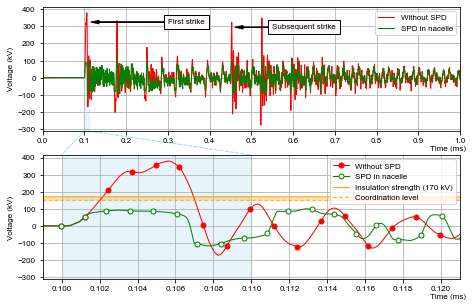

In [3]:
# FULL SIZE - Double column

# from matplotlib import rc
# rc('font',**{'family':'Times New Roman'})#,'sans-serif':['Helvetica']})
# rc('font',**{'family':'Arial'})
# rc('text', usetex=True)
font_size = 8
marker_size = 5
mark_every = 125
line_width = 1
dash1 = 3
dash2 = 3

# define columns and X axis
all_voltages_labels = init_df_cross.columns
all_voltages_arrester_labels = init_df_cross_arrester.columns
x_time_axis1 = init_df_cross.index*1000
x_time_axis2 = init_df_cross_arrester.index*1000

## Full size picture
fig, axes = plt.subplots(2,1, figsize=(7.4803,5))
# axes = fig.add_axes([0, 0, 2, 1.5])
transf_voltage = init_df_cross[all_voltages_labels[10]]
transf_voltage_arrester = init_df_cross_arrester[all_voltages_arrester_labels[10]]

axes[0].plot(x_time_axis1, transf_voltage, 'r', label='Without SPD', lw=1)#, lw=1, ls='-', marker='o', markersize=7, markevery=50, markerfacecolor='w')
axes[0].plot(x_time_axis2, transf_voltage_arrester, 'g', label='SPD in nacelle', lw=1)#, lw=1, ls='-', marker='o', markersize=7, markevery=50)
axes[0].set_xlabel('Time (ms)', fontsize=font_size)
axes[0].set_ylabel('Voltage (kV)', fontsize=font_size)
# plt.title('Transformer overvoltage')
axes[0].legend(fontsize=font_size, loc='upper right')
axes[0].set_xlim([0, 1])
axes[0].set_xticks(np.arange(0, 1.1, step=0.1));
axes[0].set_yticks(np.arange(-300, 500, step=100))
axes[0].grid()

for tick in axes[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
for tick in axes[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)

insulation_strenght = len(x_time_axis1)*[170]
coordination_level = len(x_time_axis1)*[150]
    
axes[1].plot(x_time_axis1, transf_voltage, 'r', lw=1, ls='-', marker='o', markersize=marker_size,
             markevery=mark_every, label='Without SPD')
axes[1].plot(x_time_axis2, transf_voltage_arrester, 'g', lw=1, ls='-', marker='o', markersize=marker_size,
             markevery=mark_every, markerfacecolor='w', label='SPD in nacelle')
axes[1].plot(x_time_axis1, insulation_strenght, 'orange', lw=line_width, ls='-',
            markersize=marker_size, label='Insulation strength (170 kV)')
axes[1].plot(x_time_axis1, coordination_level, 'orange', lw=line_width, ls='--', dashes=[dash1,dash2],
            markersize=marker_size, label='Coordination level')
axes[1].set_xlabel('Time (ms)', fontsize=font_size)
axes[1].set_ylabel('Voltage (kV)', fontsize=font_size)
# plt.title('Transformer overvoltage - zoomed')
axes[1].set_xlim([0.099, 0.121])
axes[1].set_xticks(np.arange(0.1, 0.122, step=0.002))
axes[1].set_yticks(np.arange(-300, 500, step=100))
axes[1].legend(fontsize=font_size, loc='upper right')
axes[1].grid()
# axes[1].set_facecolor('lightgrey')
# axes[1].patch.set_alpha(0.2)

for tick in axes[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    

for tick in axes[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)

# for axis in ['top', 'bottom', 'left', 'right']:
#     axes[1].spines[axis].set_linewidth(3)
#     axes[1].spines[axis].set_color('k')

axes[0].axvspan(0.1, 0.11, color='skyblue', alpha=0.2, lw=1)
axes[1].axvspan(0.1, 0.11, color='skyblue', alpha=0.2, lw=1)
from matplotlib.patches import ConnectionPatch
con1 = ConnectionPatch(xyA=(0.1,-312), xyB=(0.1,415), coordsA='data', coordsB='data',
                       axesA=axes[0], axesB=axes[1], color='skyblue', lw=1, ls='--', alpha=0.7)
axes[0].add_artist(con1)
con2 = ConnectionPatch(xyA=(0.11,-312), xyB=(0.11,415), coordsA='data', coordsB='data',
                       axesA=axes[0], axesB=axes[1], color='skyblue', lw=1, ls='--', alpha=0.7)
axes[0].add_artist(con2)

axes[0].text(0.3, 315, 'First strike', bbox=dict(facecolor='snow', alpha=1), fontsize=font_size)
axes[0].arrow(0.3, 325, -0.165, 0, head_width=20, head_length=0.02, fc='k', ec='k', zorder=2)
axes[0].text(0.55, 285, 'Subsequent strike', bbox=dict(facecolor='snow', alpha=1), fontsize=font_size)
axes[0].arrow(0.55, 295, -0.07, 0, head_width=20, head_length=0.02, fc='k', ec='k', zorder=2)

axes[0].xaxis.set_label_coords(0.97,-0.12)
axes[1].xaxis.set_label_coords(0.97,-0.12)
axes[1].fill_between(x_time_axis1, insulation_strenght, coordination_level, color='orange', alpha=0.25)

plt.savefig('v_cross11(t).pdf', bbox_inches='tight', pad_inches=0.01, edgecolor='gray')

<Figure size 432x288 with 0 Axes>

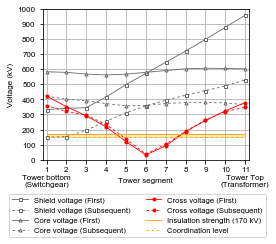

In [4]:
# Single column picture (140 mm --> 3.5433 inch)
fig = plt.figure()
fig = plt.figure(figsize=(3.5433,2.8))
pos_from_left = 0.125
pos_from_bottom = 0.15
width = 0.81
height = 0.83
pos_list = [pos_from_left, pos_from_bottom, width, height]
abs_ax = fig.add_axes(pos_list)

font_size = 8
marker_size = 3
mark_every = 100
line_width = 0.85
dash1 = 3
dash2 = 3

abs_maximum_screen = init_df_screen[(init_df_screen.index*1000>=0) & (init_df_screen.index*1000<0.45)].abs().max()
abs_maximum_core = init_df_core[(init_df_core.index*1000>=0) & (init_df_core.index*1000<0.45)].abs().max()
abs_maximum_cross = init_df_cross[(init_df_cross.index*1000>=0) & (init_df_cross.index*1000<0.45)].abs().max()

second_abs_maximum_screen = init_df_screen[(init_df_screen.index*1000>=0.45) & (init_df_screen.index*1000<1)].abs().max()
second_abs_maximums_core = init_df_core[(init_df_core.index*1000>=0.45) & (init_df_core.index*1000<1)].abs().max()
second_abs_maximums_cross = init_df_cross[(init_df_cross.index*1000>=0.45) & (init_df_cross.index*1000<1)].abs().max()

insulation_strenght = len(abs_maximum_screen)*[170]
coordination_level = len(abs_maximum_screen)*[150]
xval_ = np.arange(1, len(abs_maximum_screen) + 1, 1)
abs_ax.set_xlabel("Tower segment", fontsize=font_size)
abs_ax.set_ylabel("Voltage (kV)", fontsize=font_size)
abs_ax.plot(xval_, abs_maximum_screen, 'dimgrey', lw=line_width, marker="s", 
            markersize=marker_size, markerfacecolor='w', label='Shield voltage (First)')
abs_ax.plot(xval_, second_abs_maximum_screen, 'dimgrey', lw=line_width, ls='--', dashes=[dash1,dash2], marker="s",
            markersize=marker_size, markerfacecolor='w', label='Shield voltage (Subsequent)')

abs_ax.plot(xval_, abs_maximum_core, 'dimgrey', lw=line_width, marker="^",
            markersize=marker_size, markerfacecolor='w', label='Core voltage (First)')
abs_ax.plot(xval_, second_abs_maximums_core, 'dimgrey', lw=line_width, ls='--', dashes=[dash1,dash2], marker="^",
            markersize=marker_size, markerfacecolor='w', label='Core voltage (Subsequent)')

abs_ax.plot(xval_, abs_maximum_cross, 'r', lw=line_width, marker="o", 
            markersize=marker_size, label='Cross voltage (First)')
abs_ax.plot(xval_, second_abs_maximums_cross, 'r', lw=line_width, ls='--', dashes=[dash1,dash2], marker="o",
            markersize=marker_size, label='Cross voltage (Subsequent)')

abs_ax.plot(xval_, insulation_strenght, 'orange', lw=line_width, ls='-',
            markersize=marker_size, label='Insulation strength (170 kV)')
abs_ax.plot(xval_, coordination_level, 'orange', lw=line_width, ls='--', dashes=[dash1,dash2],
            markersize=marker_size, label='Coordination level')
#, marker=11
abs_ax.grid()

# abs_ax.legend(['Shield voltage (First strike)', 'Shield voltage (Subsequent strike)',
#                'Conductor voltage (First strike)', 'Conductor voltage (Subsequent strike)',
#              'Insulation cross voltage (First strike)', 'Insulation cross voltage (Subsequent strike)',
#               'Insulation withstand voltage'], fontsize=font_size)
abs_ax.set_xlim(xmin=0.8, xmax=11.2)
abs_ax.set_xticks(np.arange(1, len(abs_maximum_screen) + 1, step=1))
abs_ax.set_yticks(np.arange(0, 1100, step=100))
abs_ax.set_ylim(ymin=0, ymax=1000)

for tick in abs_ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
for tick in abs_ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
abs_ax.spines['top'].set_visible(True)
abs_ax.spines['right'].set_visible(True)
abs_ax.spines['bottom'].set_visible(True)
abs_ax.spines['left'].set_visible(True)

# ax_leg = abs_ax.legend(fontsize=font_size, framealpha=0.3, bbox_to_anchor=(0.20, 0.45, 0.5, 0.4), loc='best')
# Shrink current axis's height by 10% on the bottom
box = abs_ax.get_position()
abs_ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
# Put a legend below current axis
ax_leg = abs_ax.legend(loc='upper center', bbox_to_anchor=(0.460, -0.20), ncol=2,
           frameon=True, fancybox=True, fontsize=font_size*0.96)


abs_ax2 = abs_ax.twiny()
abs_ax2.xaxis.set_ticks_position("bottom")
abs_ax2.xaxis.set_label_position("bottom")
abs_ax2.spines["bottom"].set_position(("axes", -0.05))
abs_ax2.set_frame_on(False)
abs_ax2.patch.set_visible(False)
abs_ax2.tick_params(axis='x', bottom=False)
new_tick_locations = np.array([0.02, 0.98])
abs_ax2.set_xticks(new_tick_locations)
abs_ax2.set_xticklabels(['Tower bottom\n(Switchgear)', 'Tower Top\n(Transformer)'], fontsize=font_size)

abs_ax.fill_between(xval_, insulation_strenght, coordination_level, color='orange', alpha=0.25)

plt.savefig('voltages_double_strike.pdf', bbox_inches='tight', pad_inches=0.01)

In [5]:
# load surge arrester power and energy data
file_name = 'snaga_energija_silazni_odvodnik_gondola_v2.txt'
init_df_energy = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_energy = init_df_energy.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_energy.columns = init_df_energy.columns.str.strip()  # set columns without whitespaces
init_df_energy.set_index(init_df_energy.columns[0], inplace=True)  # set Time as index
init_df_energy.columns = [["Power (W)", "Energy (kJ)"]]

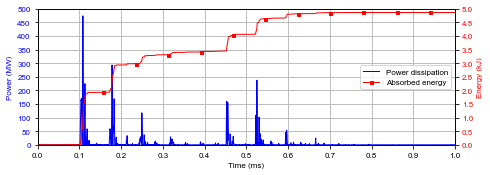

In [6]:
# from matplotlib import rc
# rc('font',**{'family':'Times New Roman'})#,'sans-serif':['Helvetica']})
# rc('font',**{'family':'Arial'})
# rc('text', usetex=True)
font_size = 8
marker_size = 3
mark_every = 100

fig, ax1 = plt.subplots(1,1, figsize=(7.4803,2.5))
# pos_from_left = 0.125
# pos_from_bottom = 0.15
# width = 0.81
# height = 0.83
# pos_list = [pos_from_left, pos_from_bottom, width, height]
# ax1 = fig.add_axes(pos_list)

x1 = init_df_energy.index*1000
ax1.plot(x1, 1/1000000 * init_df_energy[['Power (W)']].values,  'blue', lw=1, label='Power dissipation')
ax1.set_xlabel("Time (ms)", fontsize=font_size)
ax1.set_ylabel("Power (MW)", fontsize=font_size, color="blue")

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)

ax1.grid()
ax1.set_ylim([0, 5e2])
plt.yticks(np.arange(0, 5.5e2, step=0.5e2))
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax1.yaxis.offsetText.set(size=font_size, color='blue')

ax2 = ax1.twinx()
ax2.plot(x1, 1/1000 * init_df_energy[['Energy (kJ)']].values, 'r', lw=1, marker='s', markevery=8000,
         markersize=marker_size, label='Absorbed energy')

ax2.set_ylabel("Energy (kJ)", fontsize=font_size, color='r')  
ax2.tick_params(axis="y", labelsize=font_size)

for label in ax2.get_yticklabels():
    label.set_color("r")

ax2.set_xlim([0, 1])
ax2.set_xticks(np.arange(0, 1.1, step=0.1))
ax2.set_yticks(np.arange(0, 5.5, step=0.5))
ax2.set_ylim([0, 5.0])

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc=5, fontsize=font_size)

plt.savefig('absorbed_energy.pdf', bbox_inches='tight', pad_inches=0.01)

UZLAZNI UDAR MUNJE S VELIKOM STRMINOM
Imax = 12 kA; tf = 1 us

In [7]:
# load screen data
file_name = 'v_screen_uzlazni_strmi_bez_odvodnika_v2.txt'
init_df_screen2 = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_screen2 = init_df_screen2.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_screen2.columns = init_df_screen2.columns.str.strip()  # set columns without whitespaces
init_df_screen2.set_index(init_df_screen2.columns[0], inplace=True)  # set Time as index
init_df_screen2.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_screen2.columns[0:]))]
init_df_screen2 = init_df_screen2/1000

# load core data
file_name = 'v_core_uzlazni_strmi_bez_odvodnika_v2.txt'
init_df_core2 = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_core2 = init_df_core2.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_core2.columns = init_df_core2.columns.str.strip()  # set columns without whitespaces
init_df_core2.set_index(init_df_core2.columns[0], inplace=True)  # set Time as index
init_df_core2.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_core2.columns[0:]))]
init_df_core2 = init_df_core2/1000

# load cross data
file_name = 'v_cross_uzlazni_strmi_bez_odvodnika_v2.txt'
init_df_cross2 = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_cross2 = init_df_cross2.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_cross2.columns = init_df_cross2.columns.str.strip()  # set columns without whitespaces
init_df_cross2.set_index(init_df_cross2.columns[0], inplace=True)  # set Time as index
init_df_cross2.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_cross2.columns[0:]))]
init_df_cross2 = init_df_cross2/1000

<Figure size 432x288 with 0 Axes>

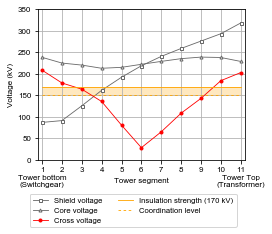

In [8]:
# plot max of each element

fig = plt.figure()
fig = plt.figure(figsize=(3.5433,2.8))
pos_from_left = 0.125
pos_from_bottom = 0.15
width = 0.81
height = 0.83
pos_list = [pos_from_left, pos_from_bottom, width, height]
abs_ax = fig.add_axes(pos_list)

font_size = 8
marker_size = 3
mark_every = 100
line_width = 0.85
dash1 = 3
dash2 = 3

abs_maximum_screen = init_df_screen2.abs().max()
abs_maximum_core = init_df_core2.abs().max()
abs_maximum_cross = init_df_cross2.abs().max()

insulation_strenght = len(abs_maximum_screen)*[170]
coordination_level = len(abs_maximum_screen)*[150]
xval_ = np.arange(1, len(abs_maximum_screen) + 1, 1)
abs_ax.set_xlabel("Tower segment", fontsize=font_size)
abs_ax.set_ylabel("Voltage (kV)", fontsize=font_size)
abs_ax.plot(xval_, abs_maximum_screen, 'dimgrey', lw=line_width, marker="s", 
            markersize=marker_size, markerfacecolor='w', label='Shield voltage')

abs_ax.plot(xval_, abs_maximum_core, 'dimgrey', lw=line_width, marker="^",
            markersize=marker_size, markerfacecolor='w', label='Core voltage')

abs_ax.plot(xval_, abs_maximum_cross, 'r', lw=line_width, marker="o", 
            markersize=marker_size, label='Cross voltage')

abs_ax.plot(xval_, insulation_strenght, 'orange', lw=line_width, ls='-',
            markersize=marker_size, label='Insulation strength (170 kV)')
abs_ax.plot(xval_, coordination_level, 'orange', lw=line_width, ls='--', dashes=[dash1,dash2],
            markersize=marker_size, label='Coordination level')
#, marker=11
abs_ax.grid()

abs_ax.set_xlim([0.8, 11.2])
plt.xticks(np.arange(1, len(abs_maximum_screen) + 1, step=1))
plt.yticks(np.arange(0, 400, step=50))
abs_ax.set_ylim(ymin=0, ymax=350)

for tick in abs_ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
for tick in abs_ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
abs_ax.spines['top'].set_visible(True)
abs_ax.spines['right'].set_visible(True)
abs_ax.spines['bottom'].set_visible(True)
abs_ax.spines['left'].set_visible(True)
    
box = abs_ax.get_position()
abs_ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
# Put a legend below current axis
ax_leg = abs_ax.legend(loc='upper center', bbox_to_anchor=(0.460, -0.20), ncol=2,
           frameon=True, fancybox=True, fontsize=font_size*0.96)
    
abs_ax2 = abs_ax.twiny()
abs_ax2.xaxis.set_ticks_position("bottom")
abs_ax2.xaxis.set_label_position("bottom")
abs_ax2.spines["bottom"].set_position(("axes", -0.05))
abs_ax2.set_frame_on(False)
abs_ax2.patch.set_visible(False)
abs_ax2.tick_params(axis='x', bottom=False)
new_tick_locations = np.array([0.02, 0.98])
abs_ax2.set_xticks(new_tick_locations)
abs_ax2.set_xticklabels(['Tower bottom\n(Switchgear)', 'Tower Top\n(Transformer)'], fontsize=font_size)

abs_ax.fill_between(xval_, insulation_strenght, coordination_level, color='orange', alpha=0.25)

plt.savefig('voltages_fast_upper.pdf', bbox_inches='tight', pad_inches=0.01)

In [9]:
file_name = 'v_cross_uzlazni_strmi_odvodnik_gondola_v2.txt'
init_df_cross_arrester2 = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_cross_arrester2 = init_df_cross_arrester2.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_cross_arrester2.columns = init_df_cross_arrester2.columns.str.strip()  # set columns without whitespaces
init_df_cross_arrester2.set_index(init_df_cross_arrester2.columns[0], inplace=True)  # set Time as index
init_df_cross_arrester2.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_cross_arrester2.columns[0:]))]
init_df_cross_arrester2 = init_df_cross_arrester2/1000

file_name = 'v_cross_uzlazni_strmi_odvodnici_v2.txt'
init_df_cross_arrester3 = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_cross_arrester3 = init_df_cross_arrester3.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_cross_arrester3.columns = init_df_cross_arrester3.columns.str.strip()  # set columns without whitespaces
init_df_cross_arrester3.set_index(init_df_cross_arrester3.columns[0], inplace=True)  # set Time as index
init_df_cross_arrester3.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_cross_arrester2.columns[0:]))]
init_df_cross_arrester3 = init_df_cross_arrester3/1000

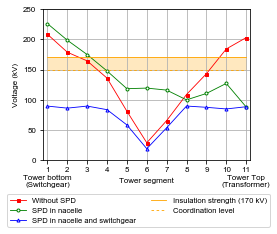

In [10]:
# plot max of each element
fig = plt.figure(figsize=(3.5433,2.8))
# fig, abs_ax = plt.subplots(1,1)
abs_maximum_cross = init_df_cross2.abs().max()
abs_maximum_cross_arrester_nacelle = init_df_cross_arrester2.abs().max()
abs_maximum_cross_arresters = init_df_cross_arrester3.abs().max()

pos_from_left = 0.125
pos_from_bottom = 0.15
width = 0.81
height = 0.83
pos_list = [pos_from_left, pos_from_bottom, width, height]
abs_ax = fig.add_axes(pos_list)

font_size = 8
marker_size = 3
mark_every = 100
line_width = 0.85
dash1 = 3
dash2 = 3

insulation_strenght = len(abs_maximum_screen)*[170]
coordination_level = len(abs_maximum_screen)*[150]
xval_ = np.arange(1, len(abs_maximum_screen) + 1, 1)
abs_ax.set_xlabel("Tower segment", fontsize=font_size)
abs_ax.set_ylabel("Voltage (kV)", fontsize=font_size)
abs_ax.plot(xval_, abs_maximum_cross, 'r', lw=line_width, marker="s", 
            markersize=marker_size, markerfacecolor='r', label='Without SPD')

abs_ax.plot(xval_, abs_maximum_cross_arrester_nacelle, 'g', lw=line_width, marker="o", 
            markersize=marker_size, markerfacecolor='w', label='SPD in nacelle')

abs_ax.plot(xval_, abs_maximum_cross_arresters, 'b', lw=line_width, marker="^", 
            markersize=marker_size, markerfacecolor='w', label='SPD in nacelle and switchgear')

abs_ax.plot(xval_, insulation_strenght, 'orange', lw=line_width, ls='-',
            markersize=marker_size, label='Insulation strength (170 kV)')
abs_ax.plot(xval_, coordination_level, 'orange', lw=line_width, ls='--', dashes=[dash1,dash2],
            markersize=marker_size, label='Coordination level')
#, marker=11
abs_ax.grid()

abs_ax.set_xlim([0.8, 11.2])
plt.xticks(np.arange(1, len(abs_maximum_screen) + 1, step=1))
plt.yticks(np.arange(0, 300, step=50))
abs_ax.set_ylim(ymin=0, ymax=250)

for tick in abs_ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
for tick in abs_ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
abs_ax.spines['top'].set_visible(True)
abs_ax.spines['right'].set_visible(True)
abs_ax.spines['bottom'].set_visible(True)
abs_ax.spines['left'].set_visible(True)
    
box = abs_ax.get_position()
abs_ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
# Put a legend below current axis
ax_leg = abs_ax.legend(loc='upper center', bbox_to_anchor=(0.460, -0.20), ncol=2,
           frameon=True, fancybox=True, fontsize=font_size*0.96)
    
abs_ax2 = abs_ax.twiny()
abs_ax2.xaxis.set_ticks_position("bottom")
abs_ax2.xaxis.set_label_position("bottom")
abs_ax2.spines["bottom"].set_position(("axes", -0.05))
abs_ax2.set_frame_on(False)
abs_ax2.patch.set_visible(False)
abs_ax2.tick_params(axis='x', bottom=False)
new_tick_locations = np.array([0.02, 0.98])
abs_ax2.set_xticks(new_tick_locations)
abs_ax2.set_xticklabels(['Tower bottom\n(Switchgear)', 'Tower Top\n(Transformer)'], fontsize=font_size)

abs_ax.fill_between(xval_, insulation_strenght, coordination_level, color='orange', alpha=0.25)

plt.savefig('voltages_with_SPDs.pdf', bbox_inches='tight', pad_inches=0.01)

UZLAZNI UDAR MUNJE S BLAGOM STRMINOM Imax = 12 kA; tf = 8 us

In [11]:
# load screen data
file_name = 'v_screen_uzlazni_blagi_bez_odvodnika_v2.txt'
init_df_screen3 = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_screen3 = init_df_screen3.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_screen3.columns = init_df_screen3.columns.str.strip()  # set columns without whitespaces
init_df_screen3.set_index(init_df_screen3.columns[0], inplace=True)  # set Time as index
init_df_screen3.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_screen3.columns[0:]))]
init_df_screen3 = init_df_screen3/1000

# load core data
file_name = 'v_core_uzlazni_blagi_bez_odvodnika_v2.txt'
init_df_core3 = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_core3 = init_df_core3.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_core3.columns = init_df_core3.columns.str.strip()  # set columns without whitespaces
init_df_core3.set_index(init_df_core3.columns[0], inplace=True)  # set Time as index
init_df_core3.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_core3.columns[0:]))]
init_df_core3 = init_df_core3/1000

# load cross data
file_name = 'v_cross_uzlazni_blagi_bez_odvodnika_v2.txt'
init_df_cross3 = pd.read_csv(file_name, sep='\t', header=1, decimal=',')
init_df_cross3 = init_df_cross3.dropna(how='all').dropna(how='all', axis=1).reset_index(drop=True)  # drop empty columns / rows
init_df_cross3.columns = init_df_cross3.columns.str.strip()  # set columns without whitespaces
init_df_cross3.set_index(init_df_cross3.columns[0], inplace=True)  # set Time as index
init_df_cross3.columns = ["Voltage_" + (str(i + 1)) +" (kV)" for i in np.arange(0, len(init_df_cross3.columns[0:]))]
init_df_cross3 = init_df_cross3/1000

<Figure size 432x288 with 0 Axes>

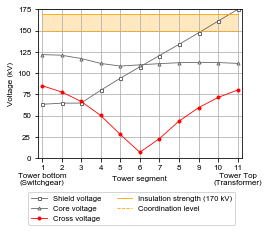

In [12]:
# Single column picture (140 mm --> 3.5433 inch)
fig = plt.figure()
fig = plt.figure(figsize=(3.5433,2.8))
pos_from_left = 0.125
pos_from_bottom = 0.15
width = 0.798
height = 0.82
abs_ax = fig.add_axes([pos_from_left, pos_from_bottom, width, height])

font_size = 8
marker_size = 3
mark_every = 100
line_width = 0.85

abs_maximum_screen = init_df_screen3.abs().max()
abs_maximum_core = init_df_core3.abs().max()
abs_maximum_cross = init_df_cross3.abs().max()

insulation_strenght = len(abs_maximum_screen)*[170]
coordination_level = len(abs_maximum_screen)*[150]
xval_ = np.arange(1, len(abs_maximum_screen) + 1, 1)
abs_ax.set_xlabel("Tower segment", fontsize=font_size)
abs_ax.set_ylabel("Voltage (kV)", fontsize=font_size)
abs_ax.plot(xval_, abs_maximum_screen, 'dimgrey', lw=line_width, marker="s", 
            markersize=marker_size, markerfacecolor='w', label='Shield voltage')

abs_ax.plot(xval_, abs_maximum_core, 'dimgrey', lw=line_width, marker="^",
            markersize=marker_size, markerfacecolor='w', label='Core voltage')

abs_ax.plot(xval_, abs_maximum_cross, 'r', lw=line_width, marker="o", 
            markersize=marker_size, label='Cross voltage')

abs_ax.plot(xval_, insulation_strenght, 'orange', lw=line_width, ls='-', 
            markersize=marker_size, label='Insulation strength (170 kV)')
abs_ax.plot(xval_, coordination_level, 'orange', lw=line_width, ls='--', 
            markersize=marker_size, label='Coordination level')
#, marker=11
abs_ax.grid()

abs_ax.set_xlim(xmin=0.8, xmax=11.2)
abs_ax.set_xticks(np.arange(1, len(abs_maximum_screen) + 1, step=1))
abs_ax.set_yticks(np.arange(0, 250, step=25))
abs_ax.set_ylim(ymin=0, ymax=175)

for tick in abs_ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
for tick in abs_ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
abs_ax.spines['top'].set_visible(True)
abs_ax.spines['right'].set_visible(True)
abs_ax.spines['bottom'].set_visible(True)
abs_ax.spines['left'].set_visible(True)
    
abs_ax2 = abs_ax.twiny()
abs_ax2.xaxis.set_ticks_position("bottom")
abs_ax2.xaxis.set_label_position("bottom")
abs_ax2.spines["bottom"].set_position(("axes", -0.05))
abs_ax2.set_frame_on(False)
abs_ax2.patch.set_visible(False)
abs_ax2.tick_params(axis='x', bottom=False)
new_tick_locations = np.array([0.02, 0.98])
abs_ax2.set_xticks(new_tick_locations)
abs_ax2.set_xticklabels(['Tower bottom\n(Switchgear)', 'Tower Top\n(Transformer)'], fontsize=font_size)

box = abs_ax.get_position()
abs_ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
# Put a legend below current axis
ax_leg = abs_ax.legend(loc='upper center', bbox_to_anchor=(0.460, -0.20), ncol=2,
           frameon=True, fancybox=True, fontsize=font_size*0.96)

abs_ax.fill_between(xval_, insulation_strenght, coordination_level, color='orange', alpha=0.25)

plt.savefig('voltages_slow_upper.pdf', bbox_inches='tight', pad_inches=0.01)